## Alumno: Matias Werbin

## Materia: Vision Computer I

 ### Enunciado



**Parte 1:** (imágenes en `/white_patch` y `/coord_cromaticas`):

1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.

2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.

3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch.

In [1]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def chromatic_coordinates(image_path):

    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalizar valores de píxeles de la imagen a valores entre 0 y 1 
    image_norm = image_rgb.astype(np.float32) / 255.0

    # Canales individuales
    r_channel = image_norm[:,:,0]
    g_channel = image_norm[:,:,1]
    b_channel = image_norm[:,:,2]

    sum_channels = r_channel + g_channel + b_channel

    # Normalizar cada canal
    r_norm = r_channel / (sum_channels + 1e-6)
    g_norm = g_channel / (sum_channels + 1e-6)
    b_norm = b_channel / (sum_channels + 1e-6)

    # Concatenar los canales normalizados para formar la imagen de coordenadas cromáticas
    chromatic_image = np.stack((r_norm, g_norm, b_norm), axis=-1)

    return chromatic_image


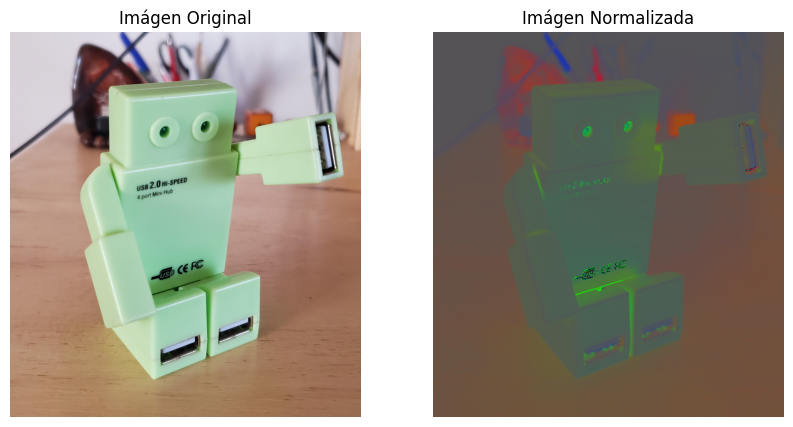

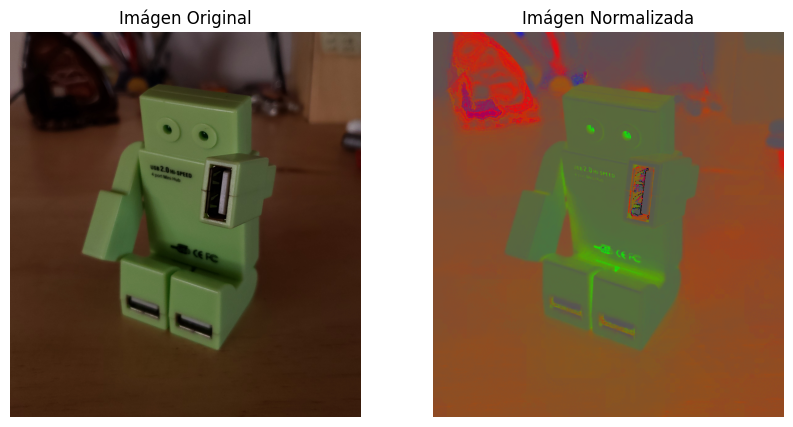

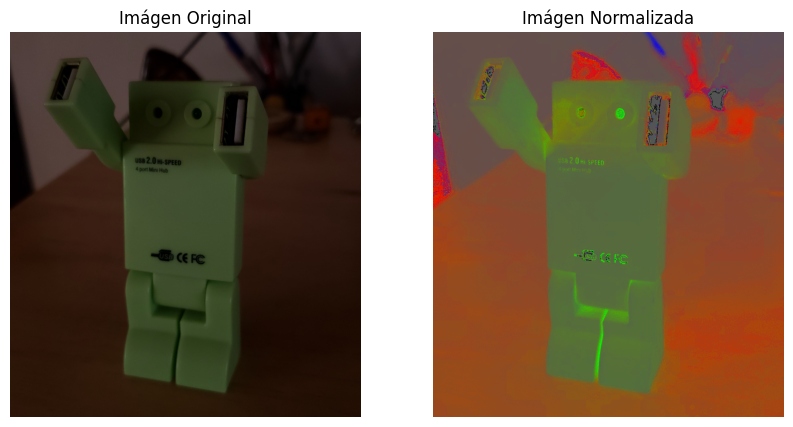

In [3]:
folder_path = "coord_cromaticas"
file_names = os.listdir(folder_path)

for file_name in file_names:
    image_path = os.path.join(folder_path, file_name)
    image = cv2.imread(image_path)
    normalized_image = chromatic_coordinates(image_path)

    # Mostrar la imagen original y la imagen normalizada
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Imágen Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image)
    plt.title("Imágen Normalizada")
    plt.axis('off')

    plt.show()





In [4]:
def white_patch(image_path):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Separación de Canales
    r_channel = image_rgb[:,:,0]
    g_channel = image_rgb[:,:,1]
    b_channel = image_rgb[:,:,2]

    # Obtención de máximo global por canal
    max_red = np.amax(r_channel)
    max_green = np.amax(g_channel)
    max_blue = np.amax(b_channel)

    adjusted_r = (r_channel * 255.0 / max_red).astype(np.uint8)
    adjusted_g = (g_channel * 255.0 / max_green).astype(np.uint8)
    adjusted_b = (b_channel * 255.0 / max_blue).astype(np.uint8)

    adjusted_image = cv2.merge([adjusted_r, adjusted_g, adjusted_b])

    return adjusted_image



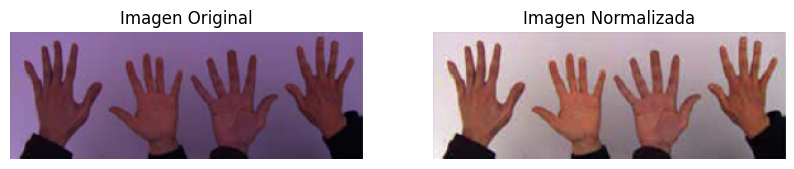

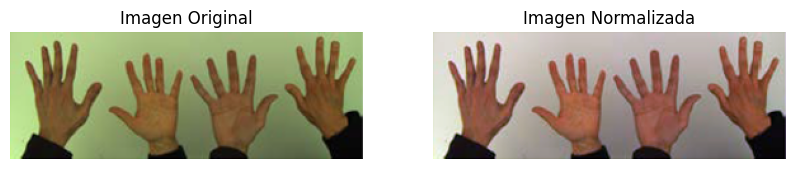

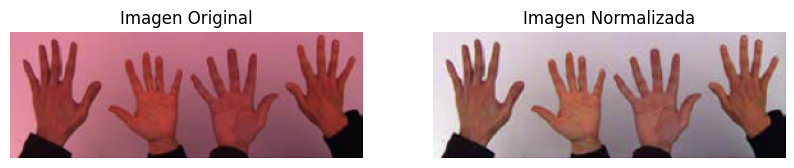

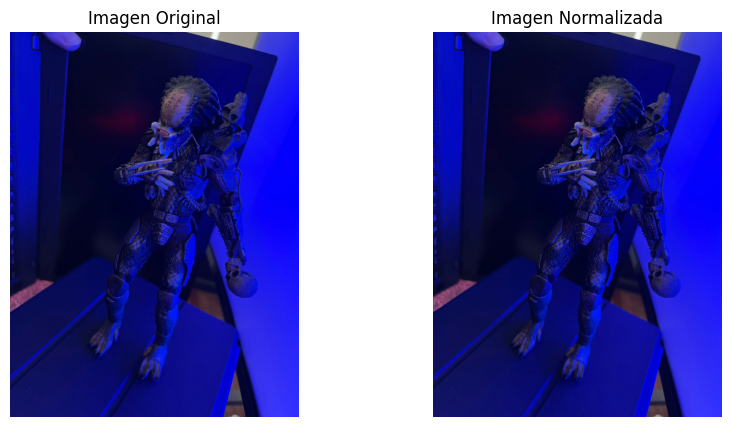

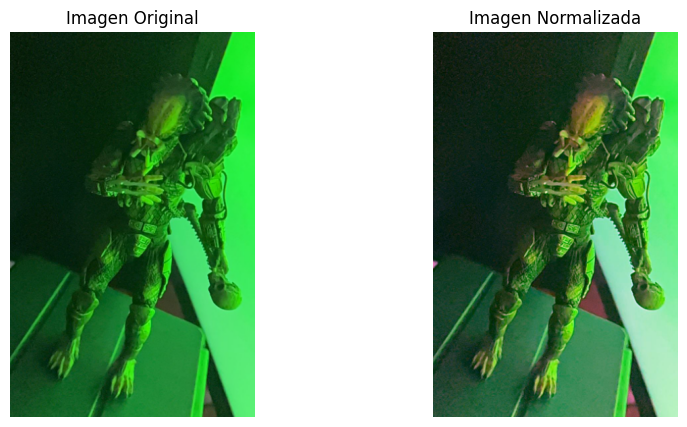

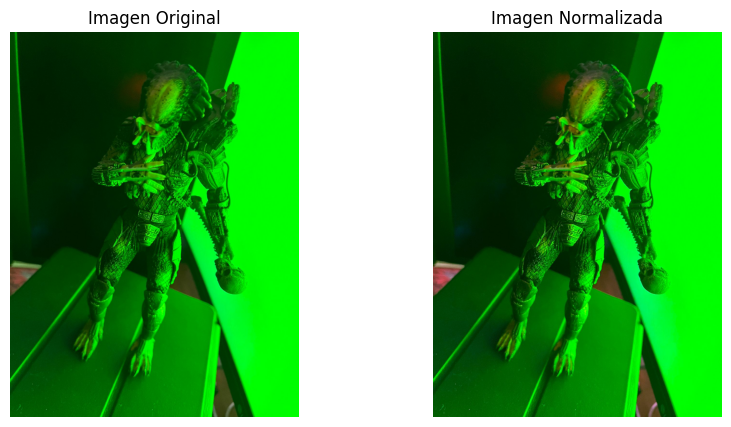

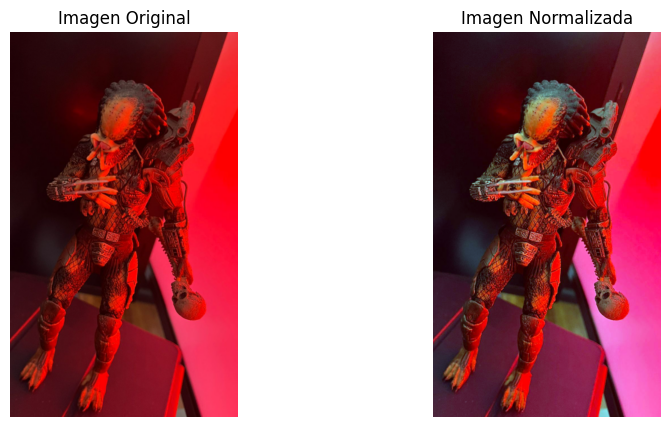

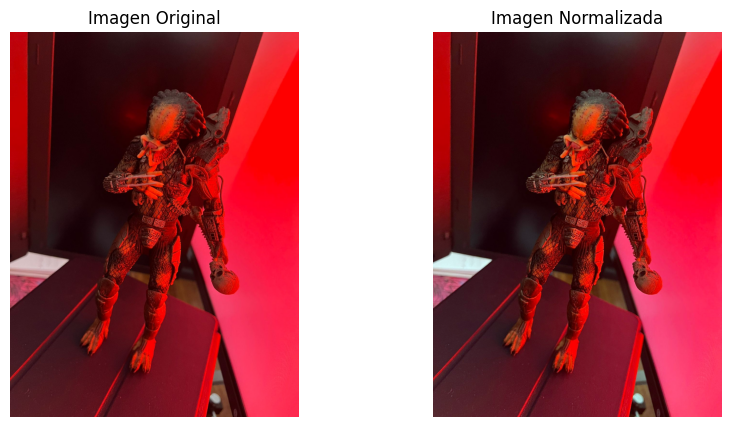

In [5]:
folder_path = "white_patch"
file_names = os.listdir(folder_path)

# Iterar sobre cada archivo en la carpeta
for file_name in file_names:
    image_path = os.path.join(folder_path, file_name)
    normalized_image = white_patch(image_path)

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB))
    plt.title("Imagen Original")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(normalized_image)
    plt.title("Imagen Normalizada")
    plt.axis('off')

    plt.show()

**Parte 2:**

1. Para las imágenes `img1_tp.png` y `img2_tp.png` leerlas con OpenCV en escala de grises y visualizarlas.

2. Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si. Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes, considera que puede ser de utilidad tomar como ‘features’ a los histogramas?

3. Para la imagen segmentacion.png analice el histograma de los canales RGB. Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.

In [6]:
img1_tp=cv2.imread('img1_tp.png',cv2.IMREAD_GRAYSCALE)
img2_tp=cv2.imread('img2_tp.png',cv2.IMREAD_GRAYSCALE)

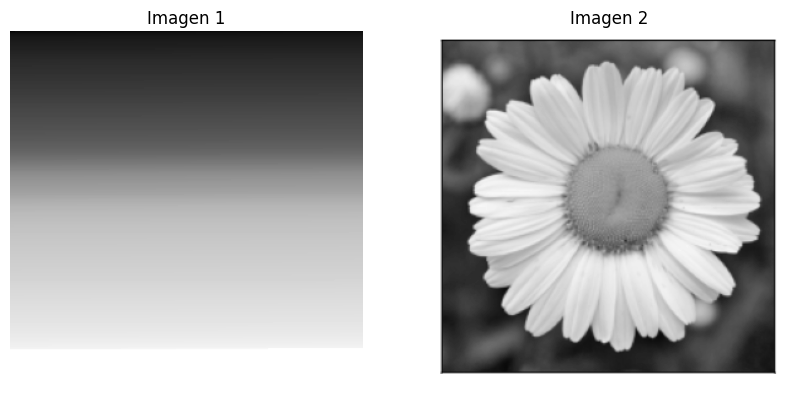

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img1_tp,cmap='gray')
plt.title("Imagen 1")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img2_tp,cmap="gray")
plt.title("Imagen 2")
plt.axis('off')

plt.show()

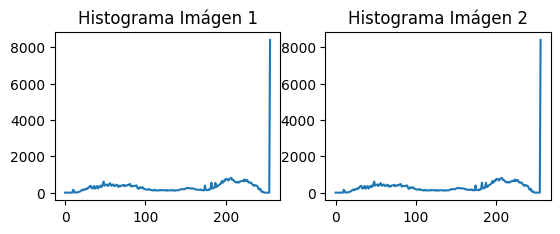

In [8]:
fig = plt.figure()

hist1,bins1 = np.histogram(img1_tp.ravel(),256,[0,256])
ax1=plt.subplot(223)
ax1.set_title('Histograma Imágen 1')
ax1.plot(hist1)

hist2,bins2 = np.histogram(img2_tp.ravel(),256,[0,256])
ax1=plt.subplot(224)
ax1.set_title('Histograma Imágen 2')
ax1.plot(hist2)

Se eligió representar histogramas de rango completo (256 bins). A simple vista, se observa que son idénticos. Al utilizar histogramas, específicamente de rango completo, se representa únicamente la distribución de intensidades de las imágenes, pero no la distribución espacial de estas intensidades. Es decir, tienen la  misma distribución de intensidades en sus pixeles pero no estan dispuestos de la misma manera por eso las imagenes no son iguales aunque compartan el mismo histograma.

En cuanto a la utilidad de los histogramas como "features" en la detección/clasificación de objetos, sí serían efectivos, ya que representan información valiosa sobre la distribución de intensidades de las imágenes. Además, son bastante robustos a ciertas transformaciones en las imágenes, como cambios de brillo o contraste, lo que los hace útiles incluso cuando las imágenes experimentan variaciones de iluminación o condiciones de captura. Sin embargo, es importante destacar que por sí solos no son un buen descriptor para la detección/clasificación de objetos, pero en combinación con otras características como los descriptores de textura, forma, etc., pueden ser una herramienta muy útil

In [9]:
# matplotlib qt

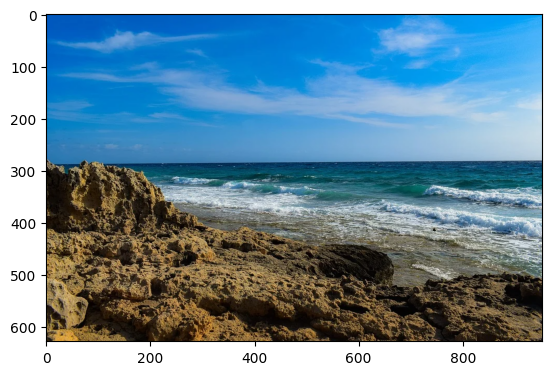

In [10]:
img=cv2.imread("segmentacion.png")
img_seg=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(img_seg)
plt.show()

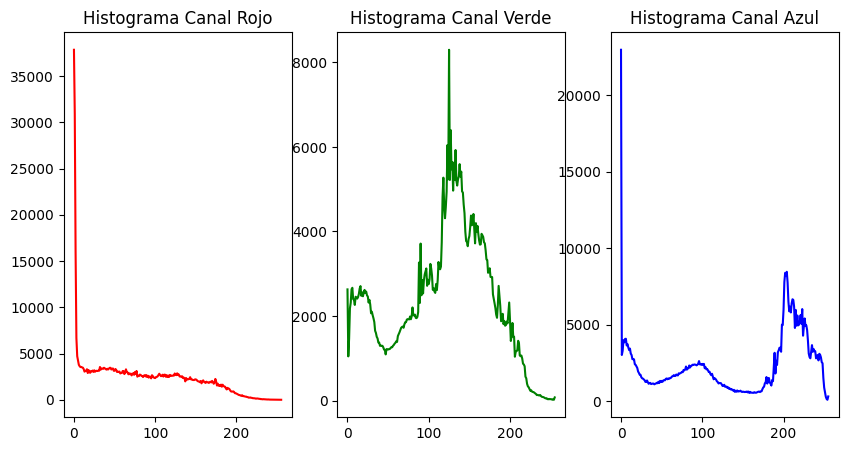

In [11]:
fig = plt.figure(figsize=(10,5))

hist_r, bins_r = np.histogram(img_seg[:,:,0].ravel(), 256, [0,256])
plt.subplot(1,3,1)  
plt.title('Histograma Canal Rojo')
plt.plot(hist_r, c='r')


hist_g, bins_g = np.histogram(img_seg[:,:,1].ravel(), 256, [0,256])
plt.subplot(1,3,2)  
plt.title('Histograma Canal Verde')
plt.plot(hist_g, c='g')

hist_b, bins_b = np.histogram(img_seg[:,:,2].ravel(), 256, [0,256])
plt.subplot(1,3,3) 
plt.title('Histograma Canal Azul')
plt.plot(hist_b, c='b')

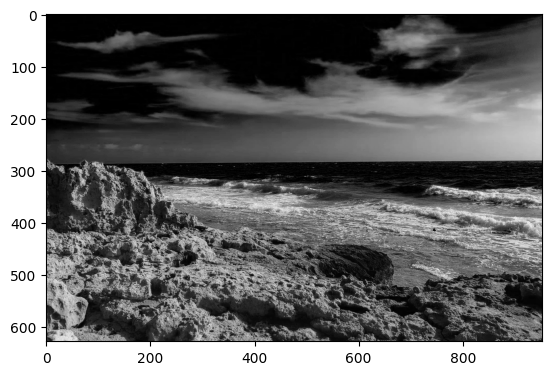

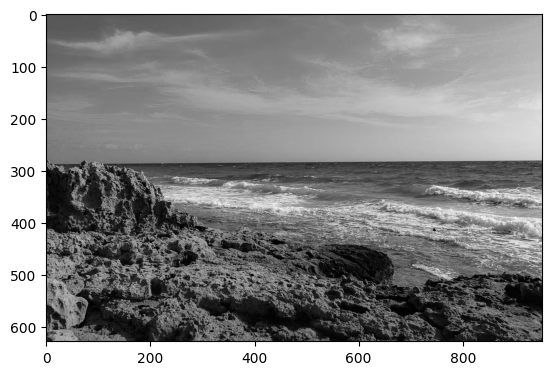

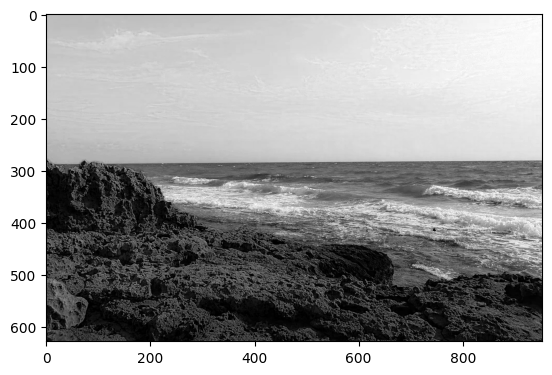

In [12]:
im_r, im_g, im_b = cv2.split(img_seg)
plt.figure()

plt.imshow(im_r, cmap='gray') # El huge segmenta bien la tierra principalemente pero se presenta confusión entre el agua y cielo, buscaremos encontrar una muestra que mejor represente cada parte y haremos una mascara compuesta por los 3 canales.
plt.show()
plt.figure()

plt.imshow(im_g,cmap='gray')
plt.show()
plt.figure()

plt.imshow(im_b,cmap='gray')
plt.show()

Del histograma podemos observar que:
- Canal rojo: muestra que la mayoría de los píxeles de la imagen tienen valores de intensidad de rojo bajos.
- Canal verde: El histograma del canal verde muestra que la mayoría de los píxeles de la imagen tienen valores de intensidad de verde bajos y medios (el pico se encuenta en intensidad 125).
- Canal azul: El histograma del canal azul muestra que la mayoría de los píxeles de la imagen tienen valores de intensidad de azul altos. Esto significa que la imagen tiene un tono general azul

Esto nos da entender que en la imagen predomina el tono azul. Que es cierto dado que el mar y el cielo ocupan el mayor porcentaje de la imagen.

Para segmentar primero pasaremos a HSV y sacaremos muestras de zonas de tierra, cielo y mar para poder generar las mascaras correspondientes.

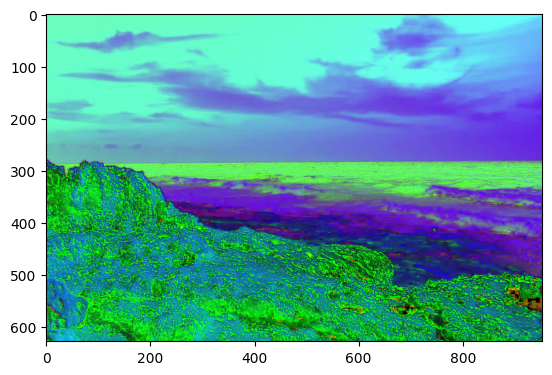

In [13]:
img=cv2.imread("segmentacion.png")
img_HSV=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.figure()
plt.imshow(img_HSV)
plt.show()

Podemos ver que con el HUE unicamente podemos segmentar muy bien la tierra, en cambio para el agua y el cielo al ser muy similares deberemos usar una mascara compuesta por los tres canales

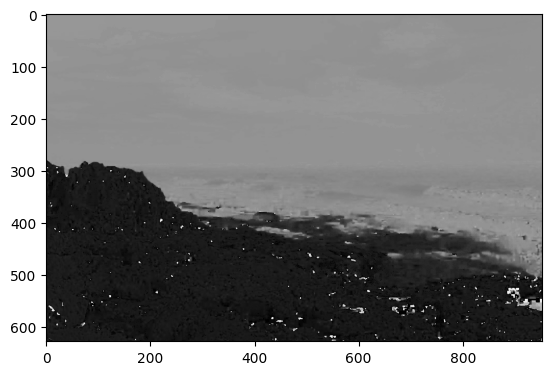

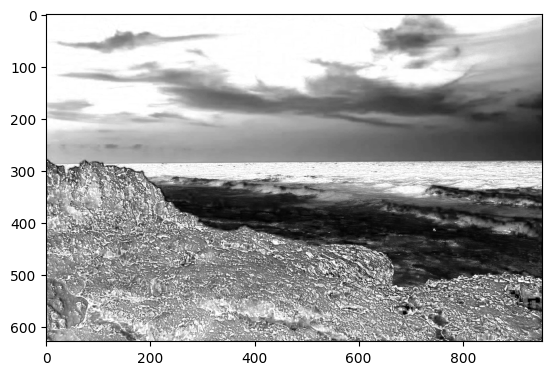

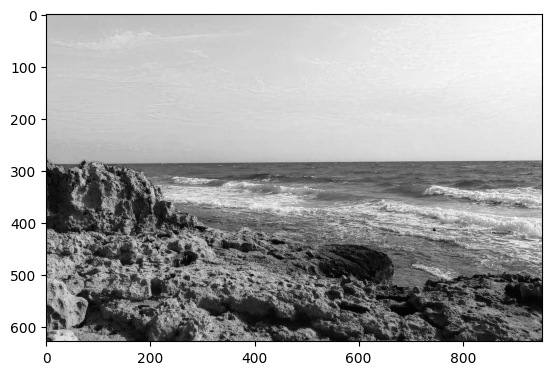

In [14]:
im_h, im_s, im_v = cv2.split(img_HSV)
plt.figure()

plt.imshow(im_h, cmap='gray') # El huge segmenta bien la tierra principalemente pero se presenta confusión entre el agua y cielo, buscaremos encontrar una muestra que mejor represente cada parte y haremos una mascara compuesta por los 3 canales.
plt.show()
plt.figure()

plt.imshow(im_s,cmap='gray')
plt.show()
plt.figure()

plt.imshow(im_v,cmap='gray')
plt.show()

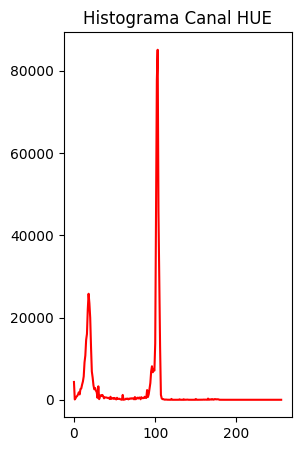

In [15]:
fig = plt.figure(figsize=(10,5))

hist_H, bins_H = np.histogram(img_HSV[:,:,0].ravel(), 256, [0,256])
plt.subplot(1,3,1)  
plt.title('Histograma Canal HUE')
plt.plot(hist_H, c='r')

Podemos "pensar" como que el histograma del canal HUE son dos distribuciones simetricas juntas. Se puede ver dos picos en la imagen una corresponde al hue medio de la parte que representa a la tierra (aprox 21) y otro pico bastante mas alto, alrededor de 102 que es el hue que caractiza al cielo y el agua. Esta suposición de distribuciones simetricas (capaz normales, deberia corroborarse realizando algun test de hipotesis sobre cada muestra) nos permiten utiizar operaciones estadisticas:

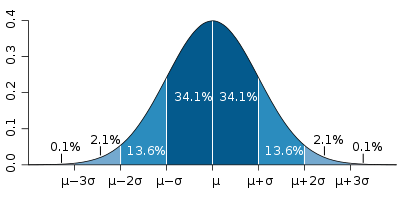

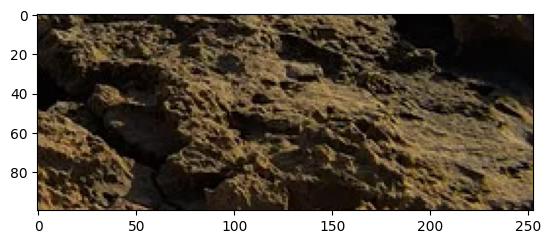

In [16]:
# Muestra Tierra

muestra_tierra_rgb=img_seg[-100:,700:,:]
muestra_tierra_hsv=img_HSV[-100:,700:,:]
plt.figure()
plt.imshow(muestra_tierra_rgb)
#plt.imshow(muestra_tierra_hsv)
plt.show()


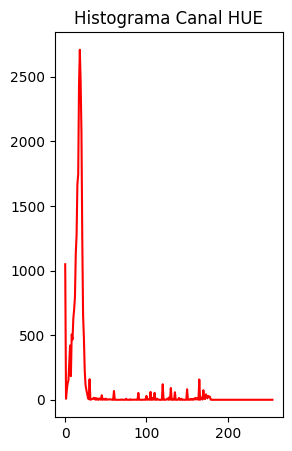

In [17]:
# Histograma de muestra tierra. Analizando la forma de la distribucion claramente esta sesgada a la derecha pero podemos pensar como "normal" en un rango mas acotado como ser [0,50]

fig = plt.figure(figsize=(10,5))

hist_H, bins_H = np.histogram(muestra_tierra_hsv[:,:,0].ravel(), 256, [0,256])
plt.subplot(1,3,1)  
plt.title('Histograma Canal HUE')
plt.plot(hist_H, c='r')

hue medio:21.528853754940712
hue medio:27.601184267970083


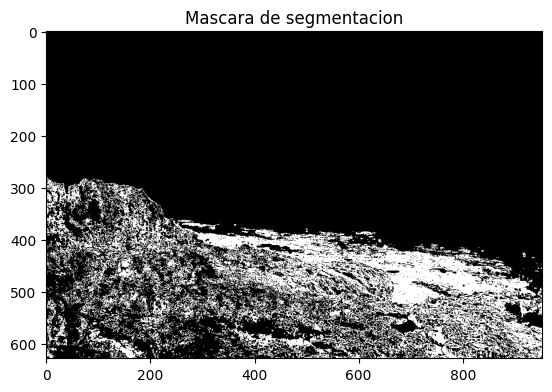

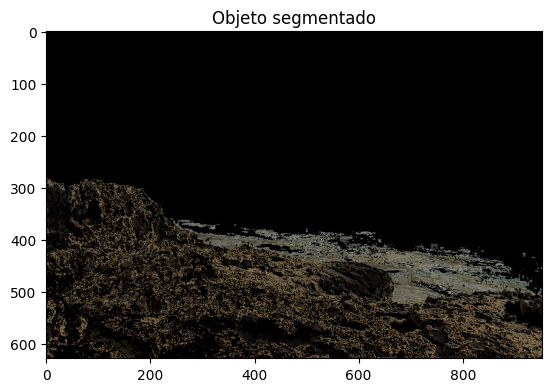

In [18]:
color_h_medio_tierra, _, _ = np.mean(muestra_tierra_hsv, axis=(0,1))
color_h_sigma_tierra, _, _ = np.std(muestra_tierra_hsv, axis=(0,1))

print(f'hue medio:{color_h_medio_tierra}')
print(f'hue medio:{color_h_sigma_tierra}')

# Suponiendo que el canal HUE
color_l = (color_h_medio_tierra-2*color_h_sigma_tierra, 10, 10)
color_u = (color_h_medio_tierra+2*color_h_sigma_tierra, 150, 150) 

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()

plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

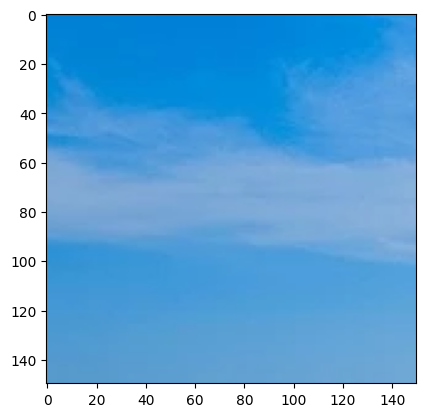

In [19]:
# Muestra Cielo

muestra_cielo_rgb=img_seg[100:250, 400:550, :]
muestra_cielo_hsv=img_HSV[100:250, 400:550, :]
plt.figure()
plt.imshow(muestra_cielo_rgb)
plt.show()

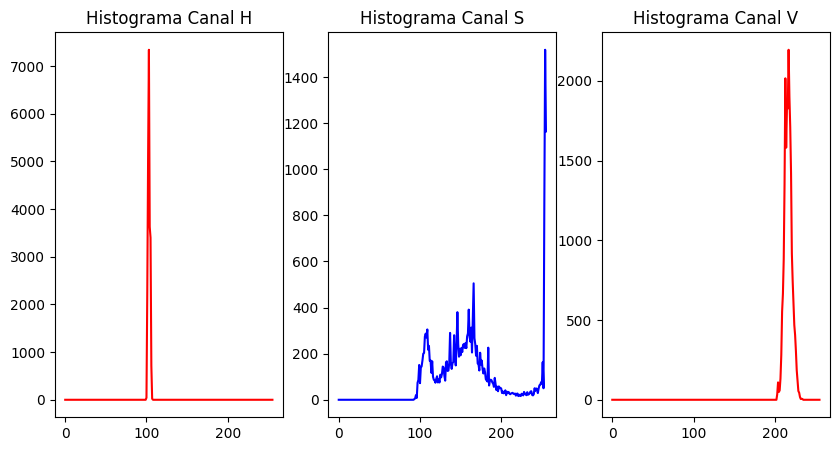

In [20]:
# Histograma de muestra cielo. Analizando la forma de la distribucion de la muestra cielo para el canal H esta es leptocurtica, es decir, con muchos valores cercanos a su media. El canal S es bastante disperso en el rango [100,200] y el canal B puede considerase simetrico por parte [150,255]

fig = plt.figure(figsize=(10,5))

hist_H, bins_H = np.histogram(muestra_cielo_hsv[:,:,0].ravel(), 256, [0,256])
plt.subplot(1,3,1)  
plt.title('Histograma Canal H')
plt.plot(hist_H, c='r')


hist_S, bins_S = np.histogram(muestra_cielo_hsv[:,:,1].ravel(), 256, [0,256])
plt.subplot(1,3,2)  
plt.title('Histograma Canal S')
plt.plot(hist_S, c='b')

hist_V, bins_V = np.histogram(muestra_cielo_hsv[:,:,2].ravel(), 256, [0,256])
plt.subplot(1,3,3)  
plt.title('Histograma Canal V')
plt.plot(hist_V, c='r')

hue medio:103.12915555555556
hue sigma:1.3028289553558365
sat medio:169.87795555555556
sat sigma:48.9679917524161
val medio:216.48435555555557
val sigma:4.548921694719679


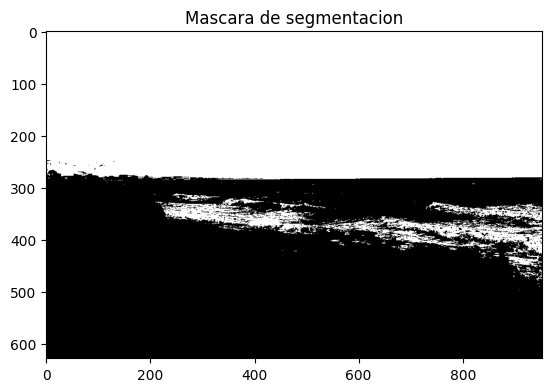

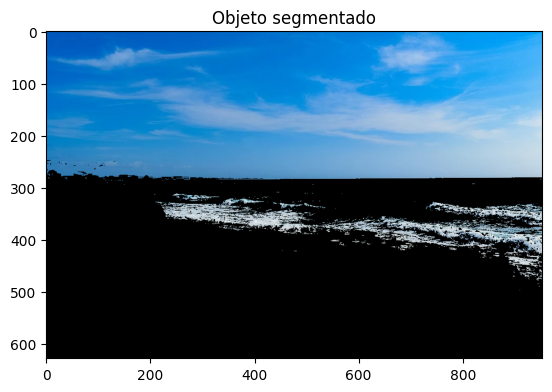

In [21]:
color_h_medio_cielo = np.mean(muestra_cielo_hsv[:,:,0]) 
color_h_sigma_cielo = np.std(muestra_cielo_hsv[:,:,0])   

color_s_medio_cielo = np.mean(muestra_cielo_hsv[:,:,1])  
color_s_sigma_cielo = np.std(muestra_cielo_hsv[:,:,1])   

color_v_medio_cielo = np.mean(muestra_cielo_hsv[:,:,2]) 
color_v_sigma_cielo = np.std(muestra_cielo_hsv[:,:,2])   



print(f'hue medio:{color_h_medio_cielo}')
print(f'hue sigma:{color_h_sigma_cielo}')

print(f'sat medio:{color_s_medio_cielo}')
print(f'sat sigma:{color_s_sigma_cielo}')

print(f'val medio:{color_v_medio_cielo}')
print(f'val sigma:{color_v_sigma_cielo}')


color_l = (color_h_medio_cielo-8.5*color_h_sigma_cielo,color_s_medio_cielo-8.5*color_s_sigma_cielo ,color_v_medio_cielo-8.5*color_v_sigma_cielo)
color_u = (color_h_medio_cielo+8.5*color_h_sigma_cielo,color_s_medio_cielo+8.5*color_s_sigma_cielo,color_v_medio_cielo+8.5*color_v_sigma_cielo) 

mask = cv2.inRange(img_HSV, color_l,  color_u)
img_segmentada = cv2.bitwise_and(img, img, mask=mask)

plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()

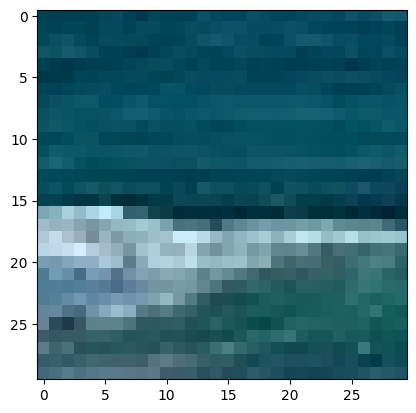

In [22]:
# Muestra Agua

muestra_agua_rgb=img_seg[300:330,300:330,:]
muestra_agua_hsv=img_HSV[300:330,300:330,:]
plt.figure()
plt.imshow(muestra_agua_rgb)
plt.show()

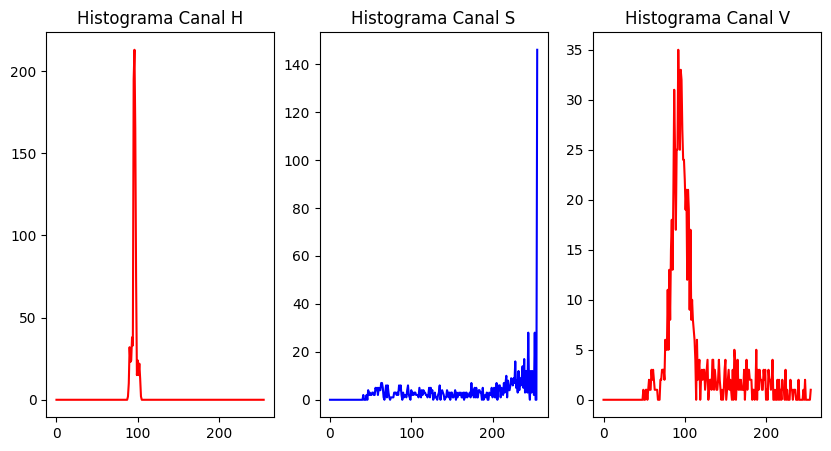

In [23]:
# Histograma de muestra de agua. Se puede ver que el canal H es leptocurtico, es decir, tiene casi todos sus valores alrededor de la media. El canal S presenta una gran cantidad de ruido y por ultimo el canal V presenta una forma bastante simetrica con un poco de ruido a la derecha de la media

fig = plt.figure(figsize=(10,5))

hist_H, bins_H = np.histogram(muestra_agua_hsv[:,:,0].ravel(), 256, [0,256])
plt.subplot(1,3,1)  
plt.title('Histograma Canal H')
plt.plot(hist_H, c='r')


hist_S, bins_S = np.histogram(muestra_agua_hsv[:,:,1].ravel(), 256, [0,256])
plt.subplot(1,3,2)  
plt.title('Histograma Canal S')
plt.plot(hist_S, c='b')

hist_V, bins_V = np.histogram(muestra_agua_hsv[:,:,2].ravel(), 256, [0,256])
plt.subplot(1,3,3)  
plt.title('Histograma Canal V')
plt.plot(hist_V, c='r')

hue medio:95.89333333333333
hue sigma:2.6457009153215587
sat medio:186.23
sat sigma:68.29917349426712
val medio:110.13333333333334
val sigma:37.206510780298174


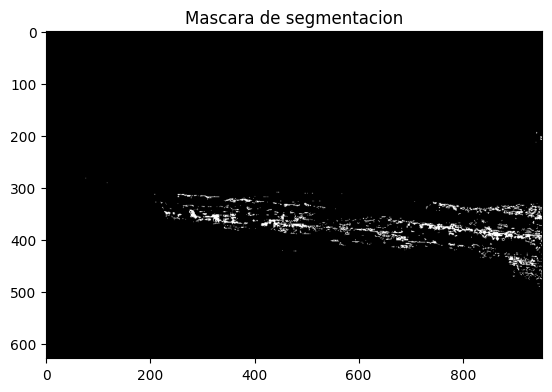

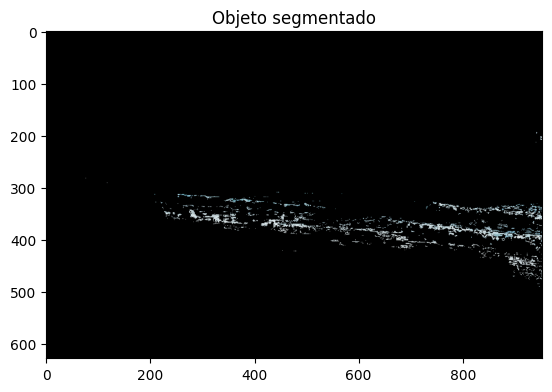

In [40]:
color_h_medio_agua = np.mean(muestra_agua_hsv[:,:,0]) 
color_h_sigma_agua = np.std(muestra_agua_hsv[:,:,0])   

color_s_medio_agua = np.mean(muestra_agua_hsv[:,:,1])  
color_s_sigma_agua = np.std(muestra_agua_hsv[:,:,1])   

color_v_medio_agua = np.mean(muestra_agua_hsv[:,:,2]) 
color_v_sigma_agua = np.std(muestra_agua_hsv[:,:,2])   



print(f'hue medio:{color_h_medio_agua}')
print(f'hue sigma:{color_h_sigma_agua}')

print(f'sat medio:{color_s_medio_agua}')
print(f'sat sigma:{color_s_sigma_agua}')

print(f'val medio:{color_v_medio_agua}')
print(f'val sigma:{color_v_sigma_agua}')


olor_l = (color_h_medio_agua-1.25*color_h_sigma_agua,color_s_medio_agua-6*color_s_medio_agua,color_v_medio_agua-6*color_v_sigma_agua)
color_u = (color_h_medio_agua+1.25*color_h_sigma_agua,color_s_medio_agua+6*color_s_medio_agua,color_v_medio_agua+6*color_v_sigma_agua)



mask = cv2.inRange(img_HSV, color_l,  color_u)

img_segmentada = cv2.bitwise_and(img, img, mask=mask)


plt.imshow(mask, cmap='gray')
plt.title('Mascara de segmentacion')
plt.show()
plt.imshow(img_segmentada[:,:,::-1])
plt.title('Objeto segmentado')
plt.show()